In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

## Visualization: Market Value of Profitable vs Non-Profitable Companies

In [93]:
df = pd.read_csv("data-cleaned.csv")

In [94]:
profitableCompanies = df[df["rank_change"] == 1]
nonProfitableCompanies = df[df["rank_change"] == 0]

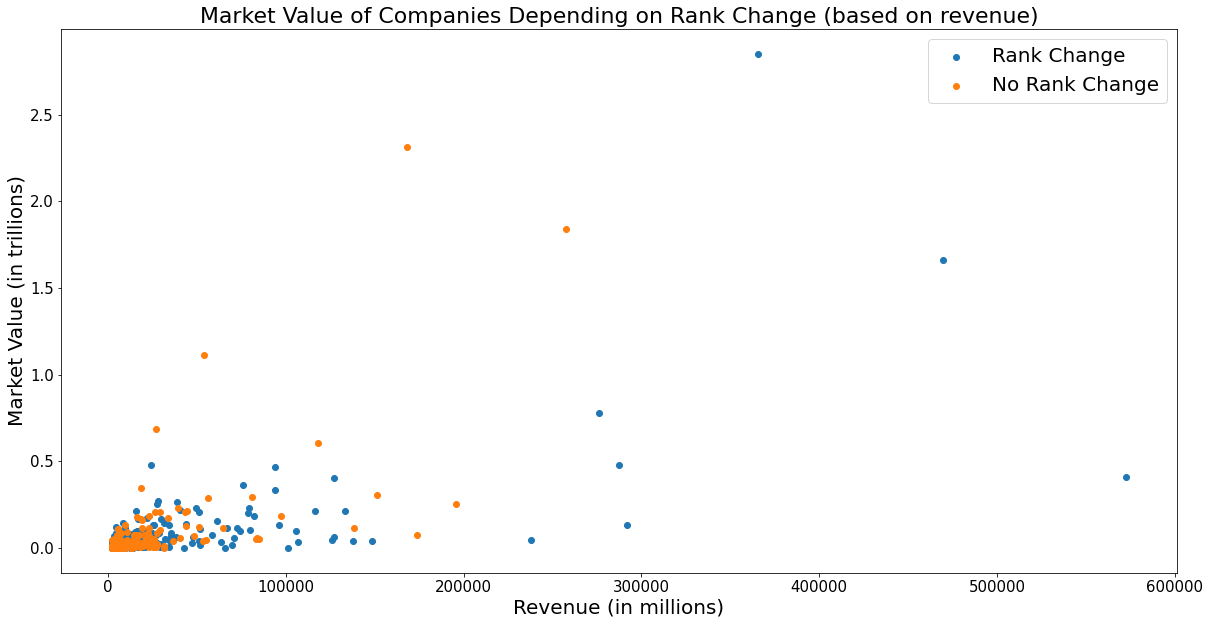

In [95]:
# setting height & width
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

# plot
plt.scatter(profitableCompanies["revenues"], profitableCompanies["market_value"]/10**6)
plt.scatter(nonProfitableCompanies["revenues"], nonProfitableCompanies["market_value"]/10**6)

# labelling
plt.legend(["Rank Change", "No Rank Change"], prop = {'size' : 20})
plt.xlabel("Revenue (in millions)")
plt.ylabel("Market Value (in trillions)")
plt.title("Market Value of Companies Depending on Rank Change (based on revenue)")

# setting font sizes
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=20) 
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

## Improving our Tensorflow model from Part 2
(copy pasting the old model file here and making changes)

## Dividing data into train data and test data
    - train data & test data will be in the form of numpy arrays
    - train data: x_train, y_train
    - test data: x_test, y_test
    - x portion is the input var, y portion is the output var

In [96]:
# loading our clean dataset
df = pd.read_csv("data-cleaned.csv")

In [99]:
# configuring sizes of our train & test dataframes
dfSize = len(df)
trainSize = int(dfSize * 0.6)
testSize = int(dfSize * 0.4)

# grabbing our training dataframes
x_train_df = df[["revenues", "revenue_percent_change", "profits", 
                "profits_percent_change", "assets", "market_value", "employees"]].head(trainSize)
y_train_df = df["rank_change"].head(trainSize)

# converting our training dataframes to numpy arrays
x_train = np.array(x_train_df)
y_train = np.array(y_train_df)

#grabbing our testing dataframes
x_test_df = df[["revenues", "revenue_percent_change", "profits", 
                "profits_percent_change", "assets", "market_value", "employees"]].tail(testSize)
y_test_df = df["rank_change"].tail(testSize)

#converting our testing dataframes to numpy arrays
x_test = np.array(x_test_df)
y_test = np.array(y_test_df)

In [100]:
# verifying the lengths of our training & testing numpy arrays
print(len(x_train) == trainSize & len(y_train) == trainSize)
print(len(x_test) == testSize & len(y_test) == testSize)

True
True


## Building our model : Improvement done here

### Goal: Predit if the company rank changed from previous year or not based on 6 input vars
    - input vars: "revenues", "revenue_percent_change", "profits", "profits_percent_change", "assets", "employees"
    
### Changes made
- Added an extra hidden layer with 128 neurons and the ReLu activation function
- Changed optimizer from sgd to adam
- Increased epoch significantly from 5 to 100
- Total Test Accuracy: 70.2% (previously 64.1%)

In [101]:
# normalize the dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

# train the model with trainig data
model.fit(x_train, y_train, epochs = 1000)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.6117
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.6505
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6505
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6159 - accuracy: 0.6578
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.6602
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.6966
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.6772
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5902 - accuracy: 0.7015
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5888 - accuracy: 0.7087
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.7039

13/13 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.7621
Epoch 83/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7597
Epoch 84/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7646
Epoch 85/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7670
Epoch 86/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.7646
Epoch 87/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7573
Epoch 88/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7718
Epoch 89/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7597
Epoch 90/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7427
Epoch 91/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.7743
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.7913
Epoch 163/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.7937
Epoch 164/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7888
Epoch 165/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7888
Epoch 166/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7864
Epoch 167/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7767
Epoch 168/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.7840
Epoch 169/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.7888
Epoch 170/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.7767
Epoch 171/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8010
Epoch 243/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8034
Epoch 244/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8107
Epoch 245/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.7937
Epoch 246/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8083
Epoch 247/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8034
Epoch 248/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8034
Epoch 249/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8180
Epoch 250/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8180
Epoch 251/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8447
Epoch 323/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.8301
Epoch 324/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8228
Epoch 325/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8350
Epoch 326/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8398
Epoch 327/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8519
Epoch 328/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8350
Epoch 329/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.8544
Epoch 330/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8447
Epoch 331/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8714
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8519
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8592
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8568
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8689
Epoch 407/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.8641
Epoch 408/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8592
Epoch 409/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8714
Epoch 410/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8350
Epoch 411/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.2877 - accuracy: 0.8714
Epoch 483/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.8786
Epoch 484/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.8859
Epoch 485/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.8835
Epoch 486/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.8738
Epoch 487/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2722 - accuracy: 0.8786
Epoch 488/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.8714
Epoch 489/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8714
Epoch 490/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.8811
Epoch 491/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.9005
Epoch 563/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.9053
Epoch 564/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.8908
Epoch 565/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.9029
Epoch 566/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.9005
Epoch 567/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.8883
Epoch 568/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2406 - accuracy: 0.8908
Epoch 569/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.8908
Epoch 570/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.8738
Epoch 571/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.9126
Epoch 643/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2402 - accuracy: 0.8786
Epoch 644/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.8956
Epoch 645/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2206 - accuracy: 0.9102
Epoch 646/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2109 - accuracy: 0.9199
Epoch 647/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 0.9223
Epoch 648/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2140 - accuracy: 0.9126
Epoch 649/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2099 - accuracy: 0.9150
Epoch 650/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2060 - accuracy: 0.9223
Epoch 651/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2243 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.1881 - accuracy: 0.9393
Epoch 723/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1891 - accuracy: 0.9272
Epoch 724/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9223
Epoch 725/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9248
Epoch 726/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1889 - accuracy: 0.9272
Epoch 727/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 0.9175
Epoch 728/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9223
Epoch 729/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2194 - accuracy: 0.9078
Epoch 730/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2051 - accuracy: 0.9199
Epoch 731/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.8956
Epoch 803/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9078
Epoch 804/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1926 - accuracy: 0.9223
Epoch 805/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1854 - accuracy: 0.9150
Epoch 806/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1743 - accuracy: 0.9296
Epoch 807/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1587 - accuracy: 0.9417
Epoch 808/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1754 - accuracy: 0.9296
Epoch 809/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9417
Epoch 810/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1743 - accuracy: 0.9320
Epoch 811/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1858 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.1516 - accuracy: 0.9442
Epoch 883/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9417
Epoch 884/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.9369
Epoch 885/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1534 - accuracy: 0.9539
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9515
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1491 - accuracy: 0.9490
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.9466
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1405 - accuracy: 0.9539
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.9490
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.9296
Epoch 963/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9466
Epoch 964/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9490
Epoch 965/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1375 - accuracy: 0.9515
Epoch 966/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.9515
Epoch 967/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9417
Epoch 968/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1704 - accuracy: 0.9369
Epoch 969/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.9393
Epoch 970/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1863 - accuracy: 0.9175
Epoch 971/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.

## Evaluating model

In [102]:
print("--Evaluate model--")
model_loss1, model_acc1 = model.evaluate(x_train,  y_train, verbose=2)
model_loss2, model_acc2 = model.evaluate(x_test,  y_test, verbose=2)
print(f"Train / Test Accuracy: {model_acc1*100:.1f}% / {model_acc2*100:.1f}%")

--Evaluate model--
13/13 - 0s - loss: 0.1228 - accuracy: 0.9587 - 119ms/epoch - 9ms/step
9/9 - 0s - loss: 3.3515 - accuracy: 0.7018 - 25ms/epoch - 3ms/step
Train / Test Accuracy: 95.9% / 70.2%
